### 1.Build classifer for MNIST dataset. 

In [43]:
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1.get dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data
y = mnist.target

In [3]:
# 2.split dataset into train_data and test_data. Using train_test_split of sklearn to do it.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

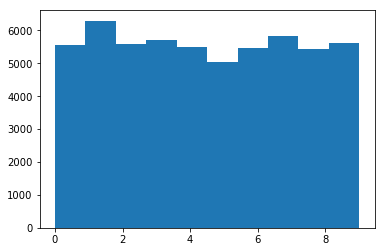

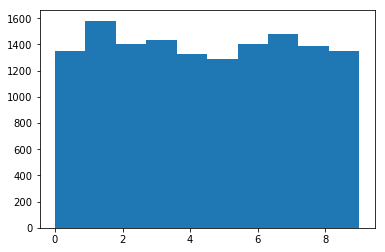

In [4]:
# 2.1 plot histgram to check the skewness of all labels
plt.hist(y_train)
plt.show()
plt.hist(y_test)
plt.show()

From the histgram we can see the labels are even distribute, so no worries about the skewness.

In [5]:
# 3.choose algorithm to first train the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [6]:
y_pred = clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.9742142857142857

KNeighborsClassifier algorithm is good for MNIST image classification in terms of accuracy, However, it is not learning model, it is instance model which need to store all training dataset, so it is not scalable algorithm.

### 2. Image Augmentation
Here i will use Keras's image augmentation api to do it.

In [22]:
X_train_image = X_train.reshape(X_train.shape[0], 28, 28, 1)

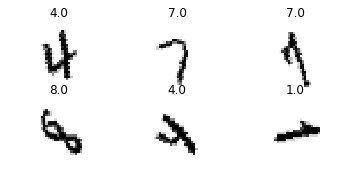

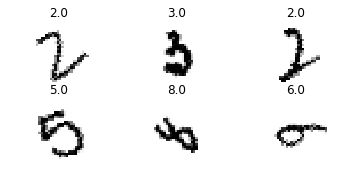

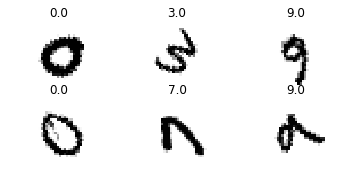

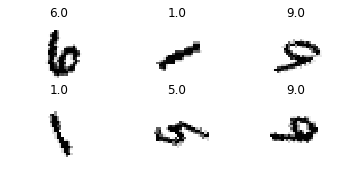

In [49]:
from keras.preprocessing.image import ImageDataGenerator
imageGen = ImageDataGenerator(rotation_range=90)
# since the keras ImageDataGenerator flow will yeild batch in infinite loop, so here we need counter to terminate the end of one loop.
count=0
image_num=24
for X_batch, y_batch in imageGen.flow(X_train_image[:image_num], y_train[:image_num], batch_size=6):
    #create a grid of 3x3 images
    for i in range(0, 6):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap = matplotlib.cm.binary)
        plt.axis("off")
        plt.title(y_batch[i])
    plt.show()
    count = count+1
    if count>=(image_num/6):
        break
